In [24]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [26]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [27]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

619

In [28]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [29]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94fb3c66a49ff5227c73360f102dffa9


In [30]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [31]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete. 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | san patricio
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | eldikan
City not found. Skipping...
Processing Record 9 of Set 1 | urumqi
City not found. Skipping...
Processing Record 10 of Set 1 | saint-joseph
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | pitsunda
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | davila
Processing Record 19 of Set 1 | yarim
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | yulara


Processing Record 33 of Set 4 | wenling
Processing Record 34 of Set 4 | samusu
City not found. Skipping...
Processing Record 35 of Set 4 | greymouth
Processing Record 36 of Set 4 | arlit
Processing Record 37 of Set 4 | evensk
Processing Record 38 of Set 4 | viedma
Processing Record 39 of Set 4 | ajdabiya
Processing Record 40 of Set 4 | sao paulo de olivenca
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | lokoja
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | caravelas
Processing Record 45 of Set 4 | longyearbyen
Processing Record 46 of Set 4 | swellendam
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | krechevitsy
Processing Record 49 of Set 4 | yerbogachen
Processing Record 50 of Set 4 | axim
Processing Record 1 of Set 5 | christchurch
Processing Record 2 of Set 5 | isangel
Processing Record 3 of Set 5 | cotonou
Processing Record 4 of Set 5 | zhangjiakou
Processing Record 5 of Set 5 | ubinskoye
Processing Record 6 of

Processing Record 19 of Set 8 | penzance
Processing Record 20 of Set 8 | khonuu
City not found. Skipping...
Processing Record 21 of Set 8 | san ignacio
Processing Record 22 of Set 8 | ambulu
Processing Record 23 of Set 8 | imeni poliny osipenko
Processing Record 24 of Set 8 | sabang
Processing Record 25 of Set 8 | lakes entrance
Processing Record 26 of Set 8 | ngawen
Processing Record 27 of Set 8 | staryy nadym
Processing Record 28 of Set 8 | ribeira grande
Processing Record 29 of Set 8 | flinders
Processing Record 30 of Set 8 | half moon bay
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | windhoek
Processing Record 33 of Set 8 | krasnyy chikoy
Processing Record 34 of Set 8 | chaman
Processing Record 35 of Set 8 | namibe
Processing Record 36 of Set 8 | jaguey grande
Processing Record 37 of Set 8 | truth or consequences
Processing Record 38 of Set 8 | batticaloa
Processing Record 39 of Set 8 | tayshet
Processing Record 40 of Set 8 | atar
Processing Record 4

Processing Record 50 of Set 11 | nikki
Processing Record 1 of Set 12 | aklavik
Processing Record 2 of Set 12 | jaen
Processing Record 3 of Set 12 | quilmana
Processing Record 4 of Set 12 | pandan
Processing Record 5 of Set 12 | paris
Processing Record 6 of Set 12 | nelson bay
Processing Record 7 of Set 12 | trairi
Processing Record 8 of Set 12 | veraval
Processing Record 9 of Set 12 | barsovo
Processing Record 10 of Set 12 | mbala
Processing Record 11 of Set 12 | nyanguge
Processing Record 12 of Set 12 | ayagoz
Processing Record 13 of Set 12 | rajshahi
Processing Record 14 of Set 12 | roald
Processing Record 15 of Set 12 | matara
Processing Record 16 of Set 12 | barranca
Processing Record 17 of Set 12 | auki
Processing Record 18 of Set 12 | esperance
Processing Record 19 of Set 12 | leh
Processing Record 20 of Set 12 | huilong
Processing Record 21 of Set 12 | aloleng
Processing Record 22 of Set 12 | antsohihy
Processing Record 23 of Set 12 | wakefield
Processing Record 24 of Set 12 | t

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,CY,2019-10-21 21:14:03,34.92,32.53,69.80,77,0,6.93
1,Kapaa,US,2019-10-21 21:14:04,22.08,-159.32,84.20,74,1,10.29
2,Khatanga,RU,2019-10-21 21:14:04,71.98,102.47,14.97,92,96,14.65
3,Jamestown,AU,2019-10-21 21:14:04,-33.21,138.60,59.36,36,92,9.62
4,San Patricio,PY,2019-10-21 21:14:04,-26.98,-56.83,66.02,76,99,5.84
5,Ushuaia,AR,2019-10-21 21:14:05,-54.81,-68.31,57.20,89,40,23.04
6,Hobart,AU,2019-10-21 21:14:05,-42.88,147.33,55.00,76,20,8.05
7,Saint-Joseph,FR,2019-10-21 21:14:05,43.56,6.97,68.00,93,100,3.36
8,Vestmannaeyjar,IS,2019-10-21 21:14:05,63.44,-20.27,40.08,65,0,31.38
9,Bluff,AU,2019-10-21 21:14:06,-23.58,149.07,65.71,70,0,15.17


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [41]:
# Import the time module.
import time 
# Get today's date in seconds. 
today = time.time()
today

1571694844.573062

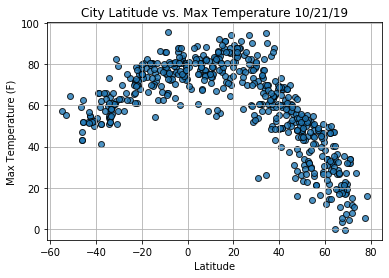

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

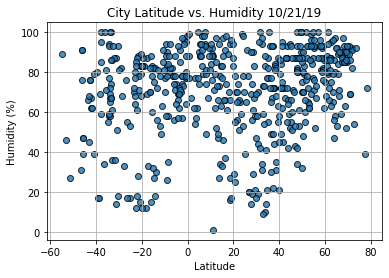

In [43]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

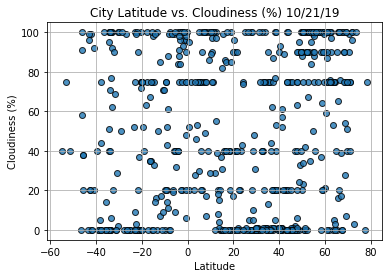

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()